# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_response = city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response['coord']['lat']
        city_lng = city_response['coord']['lon']
        city_max_temp = city_response['main']['temp_max']
        city_humidity = city_response['main']['humidity']
        city_clouds = city_response['clouds']['all']
        city_wind = city_response['wind']['speed']
        city_country = city_response['sys']['country']
        city_date = city_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | qamdo
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | novodvinsk
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | kaiapoi
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | santana
Processing Record 13 of Set 1 | huarmey
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | sao joao da barra
Processing Record 17 of Set 1 | tutoia
Processing Record 18 of Set 1 | canacona
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | vorkuta
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | chonchi
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.95,96,99,7.23,TF,1712861770
1,iqaluit,63.7506,-68.5145,-2.15,68,100,2.06,CA,1712862191
2,adamstown,-25.0660,-130.1015,21.34,55,2,7.33,PN,1712861766
3,qamdo,31.1667,97.2333,-0.83,54,90,1.85,CN,1712862191
4,margaret river,-33.9500,115.0667,13.39,76,5,5.31,AU,1712861781


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.95,96,99,7.23,TF,1712861770
1,iqaluit,63.7506,-68.5145,-2.15,68,100,2.06,CA,1712862191
2,adamstown,-25.0660,-130.1015,21.34,55,2,7.33,PN,1712861766
3,qamdo,31.1667,97.2333,-0.83,54,90,1.85,CN,1712862191
4,margaret river,-33.9500,115.0667,13.39,76,5,5.31,AU,1712861781


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

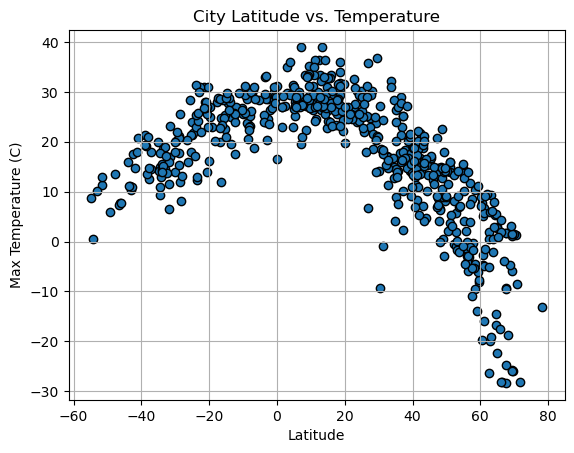

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

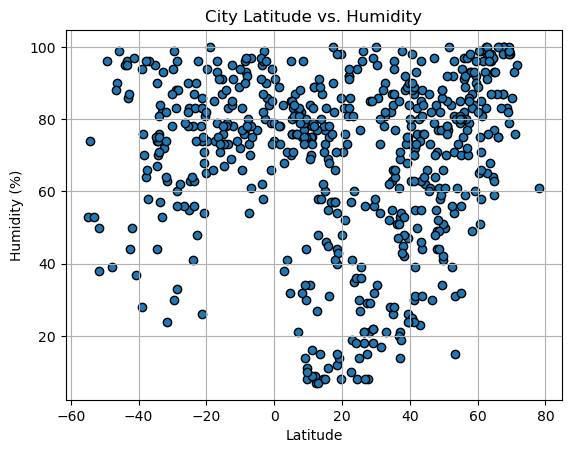

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
humidity_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values, humidity_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

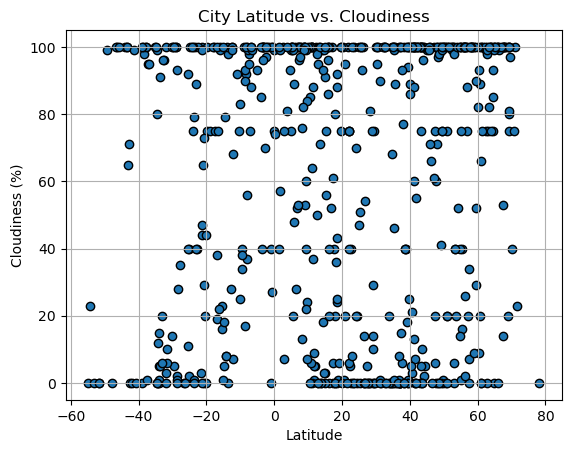

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
cloudiness_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values, cloudiness_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

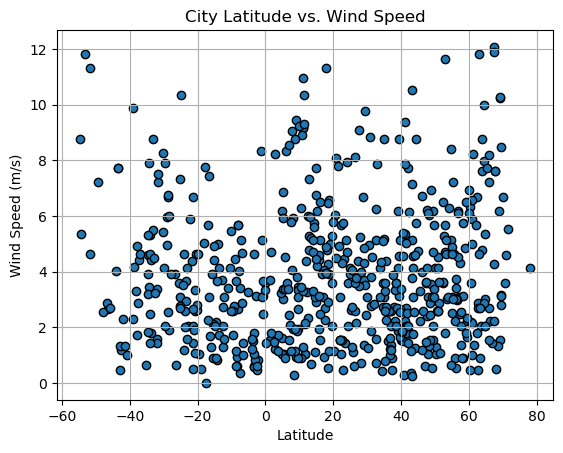

In [11]:
# Build the scatter plots for latitude vs. Wind Speed
x_values = city_data_df["Lat"].astype("float")
windspeed_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, windspeed_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-2.15,68,100,2.06,CA,1712862191
3,qamdo,31.1667,97.2333,-0.83,54,90,1.85,CN,1712862191
5,novodvinsk,64.4165,40.8122,5.42,97,93,7.96,RU,1712861826
6,klyuchi,52.2667,79.1667,-0.58,84,100,6.51,RU,1712861769
8,anadyr,64.7500,177.4833,-16.72,77,0,3.00,RU,1712861794


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.95,96,99,7.23,TF,1712861770
2,adamstown,-25.0660,-130.1015,21.34,55,2,7.33,PN,1712861766
4,margaret river,-33.9500,115.0667,13.39,76,5,5.31,AU,1712861781
7,kaiapoi,-43.3783,172.6401,11.15,96,100,7.72,NZ,1712862192
9,grytviken,-54.2811,-36.5092,0.42,74,23,5.36,GS,1712861760


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7183802889063092


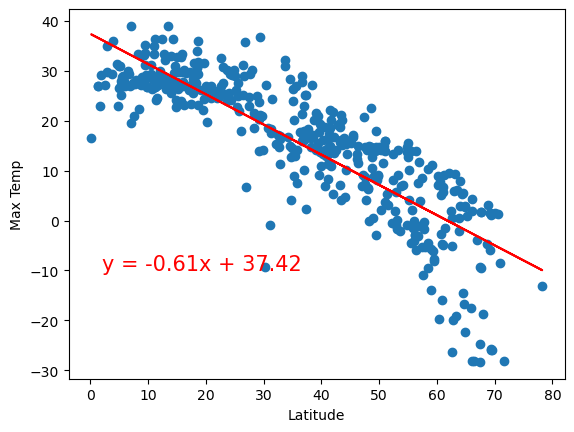

In [15]:
# Linear regression on Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
temp_north = northern_hemi_df['Max Temp'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, temp_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, temp_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(2,-10),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

plt.show()


R squared: 0.6046991304062238


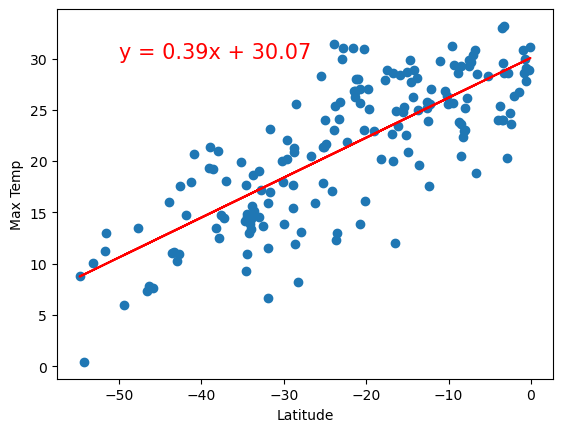

In [16]:
# Linear regression on Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
temp_south = southern_hemi_df['Max Temp'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, temp_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, temp_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** There seems to be a strong relationship between Max Temp and latitude for both the northern and southern hemisphere.
The cities that are closest to the equator have the highest Max Temps, and cities further away from the equator have lower Max Temps.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.09125995386739431


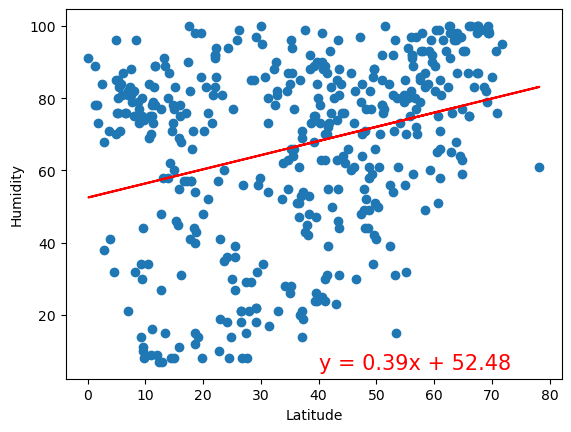

In [17]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
humdidity_north = northern_hemi_df['Humidity'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, humdidity_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, humdidity_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.06398032821079058


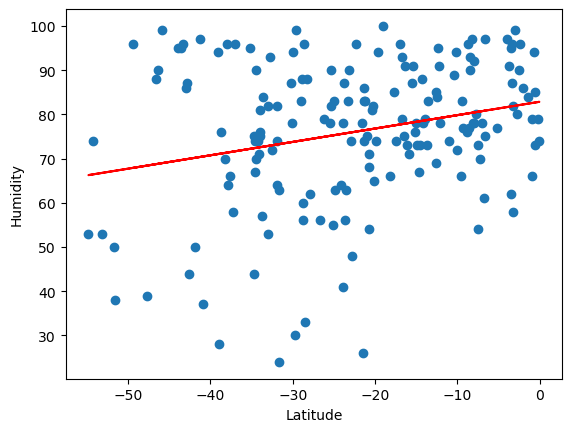

In [18]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
humdidity_south = southern_hemi_df['Humidity'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, humdidity_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, humdidity_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** It appears in the northern hemisphere that cities with higher latitude have higher humidity, while in the southern hemisphere
cities that are lower in latitude have less humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.010226942459261524


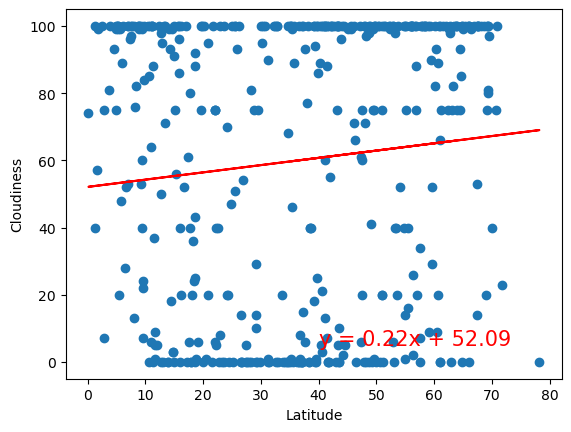

In [19]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
cloudiness_north = northern_hemi_df['Cloudiness'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, cloudiness_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, cloudiness_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.06487343088165208


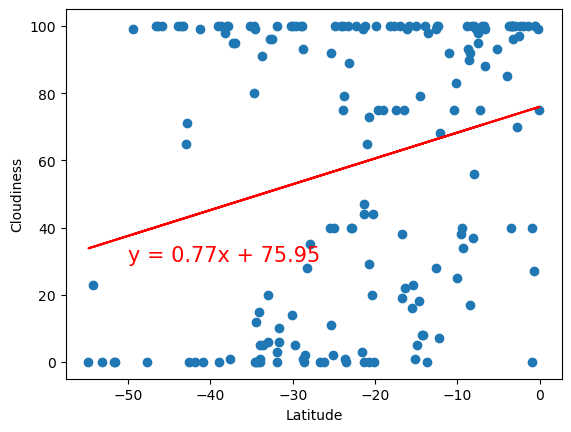

In [20]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
cloudiness_south = southern_hemi_df['Cloudiness'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, cloudiness_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, cloudiness_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

Based on the cloudiness scatterplots, it appears that in the south hemisphere, it is cloudier the closer you get to the equator, while the opposite is true of
the northern hemisphere, where it is cloudier in cities as you move north of the equator.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0017132421094739308


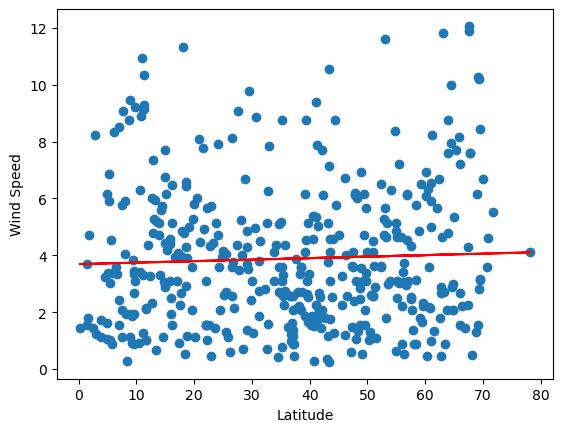

In [21]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
windspeed_north = northern_hemi_df['Wind Speed'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, windspeed_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, windspeed_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.11288227501230351


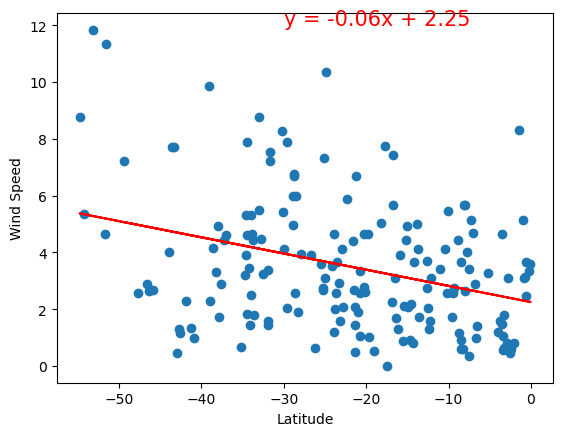

In [22]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
windspeed_south = southern_hemi_df['Wind Speed'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, windspeed_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, windspeed_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

Based on the scatter plots above, we can see that wind speed in the northern hemisphere appears to increase very slightly in cities further away from the equator. 
However in the southern hemisphere we see more significant increases in wind speed in cities further south of the equator.